In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math


dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

N = 10000 # number of people 
d = 10   # number of ads rounds
ads_selected = []
num_of_selections = [0]*d
sum_of_ad_clicked = [0]*d 
total = 0

for person in range(0,N) : 
    ad = 0  # ad is initailly given zero .
    max_upper_bound = 0 # UCB is initailly given zero .
    for round in range(0,d) : 
        if (num_of_selections[round] > 0 ) :
           average_reward = sum_of_ad_clicked[round] / num_of_selections[round] 
           delti_i = math.sqrt(3/2 * math.log(person + 1) / num_of_selections[round])
           upper_bound = average_reward + delti_i 
        else : 
           upper_bound = 1e400
        if (upper_bound > max_upper_bound) : 
            max_upper_bound = upper_bound
            ad = round
    ads_selected.append(ad)
    num_of_selections[ad] += 1 
    reward = dataset.values[person , ad]
    sum_of_ad_clicked[ad] += reward
    total += reward

<function matplotlib.pyplot.show(close=None, block=None)>

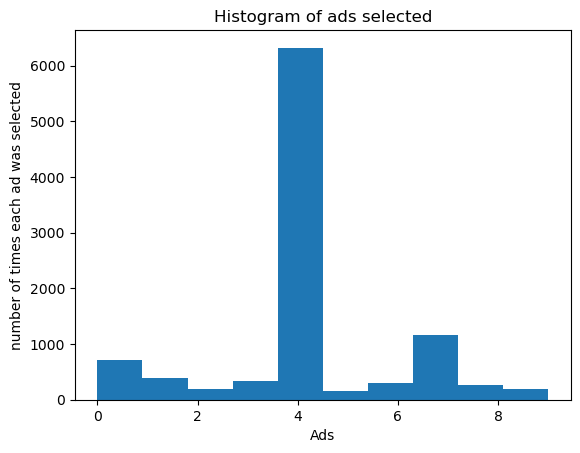

In [14]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("number of times each ad was selected")
plt.show